In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
#import biopython and seqIO
from Bio import SeqIO
import re
from tqdm import tqdm

import warnings
from Bio import BiopythonParserWarning

# Suppress only BiopythonParserWarning
warnings.simplefilter("ignore", BiopythonParserWarning)


In [2]:
from Bio import SeqIO

def get_gene_count_from_gbf(gbf_file):
    """
    Count the number of gene features in a GenBank file.

    Parameters:
        gbf_file (str): Path to the GenBank file.

    Returns:
        int: Number of 'gene' features in the GenBank record(s).
    """
    return sum(
        1
        for record in SeqIO.parse(gbf_file, "genbank")
        for feature in record.features
        if feature.type == "gene"
    )


In [3]:
import os
import pandas as pd

# Define source and output directories
gbfs_dir = "/workdir/hdd29/chloroplast_genome_evaluation/data/gbfs"
output_dir = "/workdir/hdd29/chloroplast_genome_evaluation/data/gbfs_fixed"
os.makedirs(output_dir, exist_ok=True)

# Process each file
results = []
gbf_files = [f for f in os.listdir(gbfs_dir)]
print(f"Found {len(gbf_files)} GenBank files in {gbfs_dir}")

for f in gbf_files[1:10]:
    gbf_path = os.path.join(gbfs_dir, f)
    try:
        gene_count = get_gene_count_from_gbf(gbf_path)
        results.append({"file": f, "gene_count": gene_count})
        #print(f"Processed {f}: {gene_count} genes found.")
    except Exception as e:
        print(f"Error processing {f}: {e}")

Found 50348 GenBank files in /workdir/hdd29/chloroplast_genome_evaluation/data/gbfs


In [4]:
import os
import pandas as pd
from Bio import SeqIO  # Ensure Biopython is imported

# Define directories
gbfs_dir = "/workdir/hdd29/chloroplast_genome_evaluation/data/gbfs"
output_dir = "/workdir/hdd29/chloroplast_genome_evaluation/data/gbfs_fixed"
os.makedirs(output_dir, exist_ok=True)

# Function to count gene features using Biopython
def get_gene_count_from_gbf(gbf_file):
    return sum(
        1 for record in SeqIO.parse(gbf_file, "genbank")
        for feature in record.features
        if feature.type == "gene"
    )

def get_gene_names_from_gbf(gbf_file):
    """
    Count the number of gene features in a GenBank file.

    Parameters:
        gbf_file (str): Path to the GenBank file.

    Returns:
        list (str): List of gene names.
    """
    genes = []

    for record in SeqIO.parse(gbf_file, "genbank"):
        for feature in record.features:
            if feature.type == "gene":
                genes += [feature.qualifiers.get("gene", [""])[0]]

    return genes


# List all files in the directory
gbf_files = [f for f in os.listdir(gbfs_dir)]
print(f"Found {len(gbf_files)} GenBank files in {gbfs_dir}")

# Process a subset of files
results = []
for f in tqdm(gbf_files):
    gbf_path = os.path.join(gbfs_dir, f)
    try:
        gene_count = get_gene_count_from_gbf(gbf_path)
        results.append({"file": f, "gene_count": gene_count})
        #print(f"Processed {f}: {gene_count} genes found.")
    except Exception as e:
        print(f"Error processing {f}: {e}")

# Build and display DataFrame
df = pd.DataFrame(results)
print("\nGene counts summary:")
print(df)

# Optional: Save to CSV
# df.to_csv("gene_counts_subset.csv", index=False)


Found 50348 GenBank files in /workdir/hdd29/chloroplast_genome_evaluation/data/gbfs


100%|██████████| 50348/50348 [05:38<00:00, 148.52it/s]


Gene counts summary:
                                            file  gene_count
0          NC0081151Eucalyptusglobulus.gbf.fixed         126
1            NC0009251Porphyrapurpurea.gbf.fixed          49
2      NC0081161Staurastrumpunctulatum.gbf.fixed          62
3             NC0009261Guillardiatheta.gbf.fixed          41
4              NC0071441Cucumissativus.gbf.fixed         123
...                                          ...         ...
50343         OR4002481Amorphophalluskrausei.gbf         125
50344               PQ8496031Rhopalocnemissp.gbf           0
50345          OR4020971Polygonatumkingianum.gbf         128
50346                                update1.gbf          84
50347                 OR4157021Deutziahamata.gbf         129

[50348 rows x 2 columns]


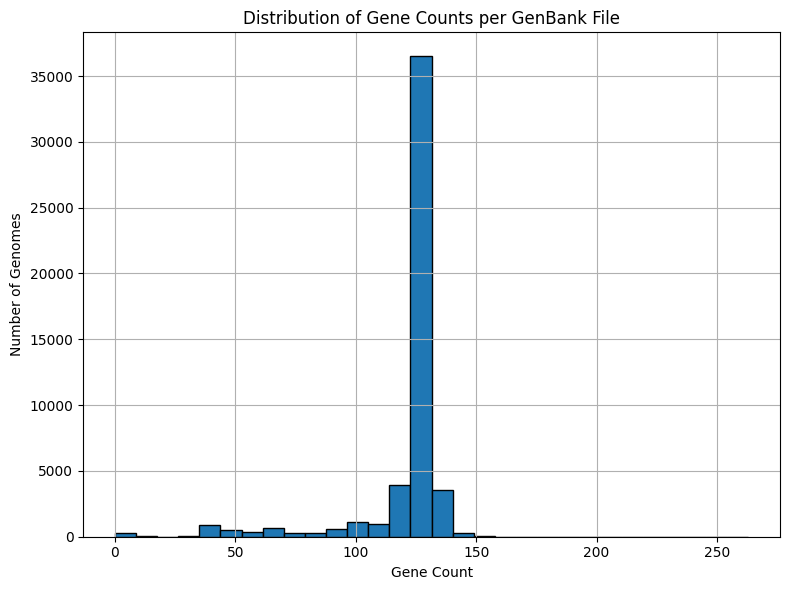

In [6]:
#make a histogram of gene count
import matplotlib.pyplot as plt

# Make a histogram of gene counts
plt.figure(figsize=(8, 6))
plt.hist(df["gene_count"], bins=30, edgecolor='black')
plt.title("Distribution of Gene Counts per GenBank File")
plt.xlabel("Gene Count")
plt.ylabel("Number of Genomes")
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
print(df.head())
genomes_dir = "/workdir/hdd29/theRefseqening/theRefseqening/data/genomes"

def count_ambiguous_bases(seq_record):
    """
    Count ambiguous bases (N's) in a sequence record.
    
    Parameters:
        seq_record (SeqRecord): A Biopython SeqRecord object.
        
    Returns:
        int: Number of ambiguous bases in the sequence.
    """
    return seq_record.seq.count('N')

df['ambiguous_bases'] = 0  # Initialize the column

for f in tqdm(df['file']):
    try: 
        # Skip files that are not GenBank files
        gbf_path = os.path.join(gbfs_dir, f)
        basename = os.path.splitext(os.path.basename(f))[0]
        if (basename.endswith(".gbf")):
            basename = basename[:-4]
        genome_path = os.path.join(genomes_dir, basename+".fa")

        Ns= count_ambiguous_bases(SeqIO.read(genome_path, "fasta"))
        df.loc[df['file'] == f, 'ambiguous_bases'] = Ns
    except Exception as e:
        print(f"Error processing file {f}: {e}")
        continue

print(df.head())


                                        file  gene_count  ambiguous_bases
0      NC0081151Eucalyptusglobulus.gbf.fixed         126                0
1        NC0009251Porphyrapurpurea.gbf.fixed          49                0
2  NC0081161Staurastrumpunctulatum.gbf.fixed          62                0
3         NC0009261Guillardiatheta.gbf.fixed          41                0
4          NC0071441Cucumissativus.gbf.fixed         123                0


  0%|          | 64/50348 [00:00<05:03, 165.91it/s]

Error processing file NC0050872Physcomitrellapatens.gbf.fixed: [Errno 2] No such file or directory: '/workdir/hdd29/theRefseqening/theRefseqening/data/genomes/NC0050872Physcomitrellapatens.fa'


 26%|██▌       | 13028/50348 [01:13<02:56, 212.04it/s]

Error processing file 20170403_CHM.gbf: [Errno 2] No such file or directory: '/workdir/hdd29/theRefseqening/theRefseqening/data/genomes/20170403_CHM.fa'


 26%|██▌       | 13072/50348 [01:14<02:57, 209.61it/s]

Error processing file 1.gbf: [Errno 2] No such file or directory: '/workdir/hdd29/theRefseqening/theRefseqening/data/genomes/1.fa'


 26%|██▋       | 13288/50348 [01:15<03:47, 162.72it/s]

Error processing file ExampleFASTA.gbf: [Errno 2] No such file or directory: '/workdir/hdd29/theRefseqening/theRefseqening/data/genomes/ExampleFASTA.fa'


 84%|████████▍ | 42379/50348 [03:35<00:37, 212.85it/s]

Error processing file NC_000932.gbf: [Errno 2] No such file or directory: '/workdir/hdd29/theRefseqening/theRefseqening/data/genomes/NC_000932.fa'


100%|██████████| 50348/50348 [04:16<00:00, 196.33it/s]

Error processing file P12345.gbf: [Errno 2] No such file or directory: '/workdir/hdd29/theRefseqening/theRefseqening/data/genomes/P12345.fa'
Error processing file sample.gbf: [Errno 2] No such file or directory: '/workdir/hdd29/theRefseqening/theRefseqening/data/genomes/sample.fa'
Error processing file update.gbf: [Errno 2] No such file or directory: '/workdir/hdd29/theRefseqening/theRefseqening/data/genomes/update.fa'
Error processing file update1.gbf: [Errno 2] No such file or directory: '/workdir/hdd29/theRefseqening/theRefseqening/data/genomes/update1.fa'
                                        file  gene_count  ambiguous_bases
0      NC0081151Eucalyptusglobulus.gbf.fixed         126                0
1        NC0009251Porphyrapurpurea.gbf.fixed          49                0
2  NC0081161Staurastrumpunctulatum.gbf.fixed          62                0
3         NC0009261Guillardiatheta.gbf.fixed          41                0
4          NC0071441Cucumissativus.gbf.fixed         123        

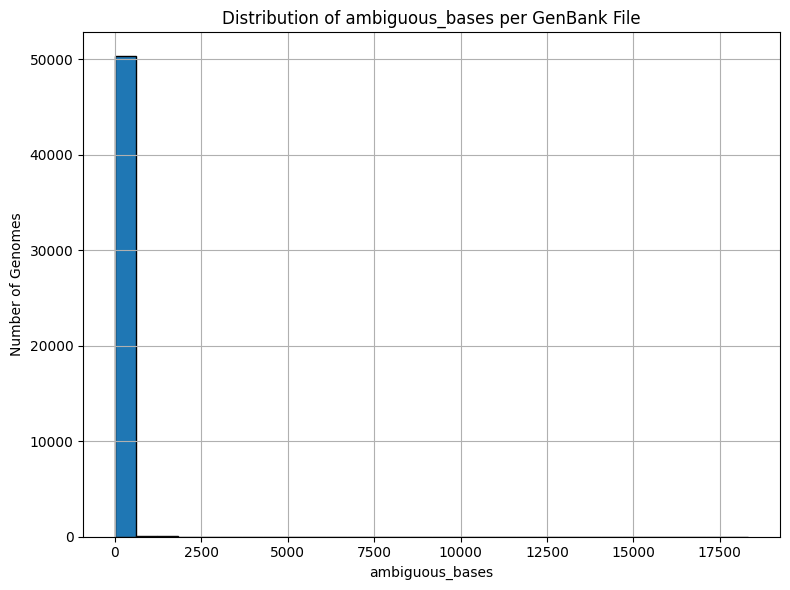

number genomes w at least 1 ambiguous base: 3075


In [22]:
# Make a histogram of gene counts
plt.figure(figsize=(8, 6))
plt.hist(df["ambiguous_bases"], bins=30, edgecolor='black')
plt.title("Distribution of ambiguous_bases per GenBank File")
plt.xlabel("ambiguous_bases")
plt.ylabel("Number of Genomes")
plt.grid(True)
plt.tight_layout()
plt.show()

print("number genomes w at least 1 ambiguous base:", df[df['ambiguous_bases'] > 0].shape[0])

In [31]:
tax_data = pd.read_csv("data/taxonomy_info.csv")
#Extract LUI from file names
df["LUI"] = df["file"].str.split(".").str[0]

def get_lui(organism_name, accession_id):
    #take the first two words of the organism name
    org_short = "".join(organism_name.split()[:2])
    lui = f"{accession_id}{org_short}"  # Remove space in LUI
    return re.sub(r'[^A-Za-z0-9]', '', lui) 

#make the LUI of tax data match the LUI of df
tax_data["LUI"] = tax_data.apply(lambda x: get_lui(x["Organism"], x["ID"]), axis=1)
print(tax_data.head())
#merge the two dataframes on LUI
df1 = pd.merge(df, tax_data, on="LUI", how="left")
print(df1.head())

#print number of 

           ID                 Organism  \
0  PV890880.1      Cyanotis nyctitropa   
1  PV948728.1  Euonymus chloranthoides   
2  PV962930.1      Cardamine leucantha   
3  PQ611459.1    Polygonatum kingianum   
4  PQ611458.1    Polygonatum kingianum   

                                            Taxonomy  Year SequencingTech  \
0  Eukaryota; Viridiplantae; Streptophyta; Embryo...  2025       Illumina   
1  Eukaryota; Viridiplantae; Streptophyta; Embryo...  2025       Illumina   
2  Eukaryota; Viridiplantae; Streptophyta; Embryo...  2025        Unknown   
3  Eukaryota; Viridiplantae; Streptophyta; Embryo...  2025       Illumina   
4  Eukaryota; Viridiplantae; Streptophyta; Embryo...  2025       Illumina   

                               LUI  
0      PV8908801Cyanotisnyctitropa  
1  PV9487281Euonymuschloranthoides  
2      PV9629301Cardamineleucantha  
3    PQ6114591Polygonatumkingianum  
4    PQ6114581Polygonatumkingianum  
                                        file  gene_count  ambi

In [56]:
# for each species, we need a decisionmaking criteria to determine which to keep. 

#how many unique organisms are there?
num_unique_organisms = df1["Organism"].nunique()
print(f"Number of unique organisms: {num_unique_organisms}")

#how many organisms appear just once in the dataset?
num_single_organisms = df1[df1.duplicated("Organism", keep=False) == False].shape[0]
print(f"Number of organisms with only one genome: {num_single_organisms}")

#add these rows to a new dataframe, selected_genomes 
selected_genomes = df1[df1.duplicated("Organism", keep=False) == False]
print(f"Selected genomes shape: {selected_genomes.shape}")

#remove all the selected genomes from the original dataframe
df_remaining = df1[df1.duplicated("Organism", keep=False)]

tech_priority = ['PacBio', 'Oxford Nanopore', 'Illumina', '454/Roche', 'Sanger', 'Ion Torrent']
df_remaining['tech_rank'] = df_remaining['SequencingTech'].map({t: i for i, t in enumerate(tech_priority)}).fillna(len(tech_priority))

df_remaining = df_remaining.sort_values(
    by=['Organism', 'gene_count', 'ambiguous_bases', 'Year', 'tech_rank'],
    ascending=[True, False, True, False, True]
)

best_per_org = df_remaining.groupby('Organism').head(1)
ambig = (
    df_remaining
    .sort_values(['Organism','gene_count','ambiguous_bases','Year','tech_rank'],
                 ascending=[True,False,True,False,True])
    .groupby('Organism')
    .apply(lambda g: g.iloc[0][['gene_count','ambiguous_bases','Year','tech_rank']].tolist()
           == g.iloc[1][['gene_count','ambiguous_bases','Year','tech_rank']].tolist()
           if len(g) > 1 else False)
)
sum(ambig)

selected_genomes = pd.concat([selected_genomes, best_per_org]).drop(columns='tech_rank')

print(selected_genomes.shape)


Number of unique organisms: 16159
Number of organisms with only one genome: 4325
Selected genomes shape: (4325, 9)


/tmp/ipykernel_1151218/551417372.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remaining['tech_rank'] = df_remaining['SequencingTech'].map({t: i for i, t in enumerate(tech_priority)}).fillna(len(tech_priority))


(16159, 9)


/tmp/ipykernel_1151218/551417372.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.iloc[0][['gene_count','ambiguous_bases','Year','tech_rank']].tolist()


In [52]:
#filter the selected_genomes_dataframe to only include genomes that contain "Streptophyta" in the Organism column
selected_genomes = selected_genomes[selected_genomes['Taxonomy'].str.contains("Streptophyta", case=False, na=False)]
print(selected_genomes.shape)


(15479, 9)


In [41]:
selected_genomes.info()
selected_genomes.describe(include="all")
selected_genomes.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16159 entries, 10159 to 46721
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file             16159 non-null  object 
 1   gene_count       16159 non-null  int64  
 2   ambiguous_bases  16159 non-null  int64  
 3   LUI              16159 non-null  object 
 4   ID               16159 non-null  object 
 5   Organism         16159 non-null  object 
 6   Taxonomy         16159 non-null  object 
 7   Year             16159 non-null  float64
 8   SequencingTech   16159 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB


,file,gene_count,ambiguous_bases,LUI,ID,Organism,Taxonomy,Year,SequencingTech
10159,NC0717851Hypecoumzhukanum.gbf.fixed,130,0,NC0717851Hypecoumzhukanum,NC_071785.1,Hypecoum zhukanum,Eukaryota; Viridiplantae; Streptophyta; Embryo...,2023.0,Illumina
10631,MF5367051Cucumismelo.gbf,127,0,MF5367051Cucumismelo,MF536705.1,Cucumis melo var. inodorus,Eukaryota; Viridiplantae; Streptophyta; Embryo...,2017.0,Unknown
10769,NC0776141Juniperussemiglobosa.gbf.fixed,86,0,NC0776141Juniperussemiglobosa,NC_077614.1,Juniperus semiglobosa,Eukaryota; Viridiplantae; Streptophyta; Embryo...,2023.0,Illumina
10771,NC0776151Juniperuspseudosabina.gbf.fixed,87,0,NC0776151Juniperuspseudosabina,NC_077615.1,Juniperus pseudosabina,Eukaryota; Viridiplantae; Streptophyta; Embryo...,2023.0,Illumina
11487,NC0820491Rhododendronfarrerae.gbf.fixed,117,0,NC0820491Rhododendronfarrerae,NC_082049.1,Rhododendron farrerae,Eukaryota; Viridiplantae; Streptophyta; Embryo...,2023.0,Illumina


In [48]:
#summary stats for gene count, ambiguous bases
summary_stats = selected_genomes[['gene_count', 'ambiguous_bases','Year']].describe()
print(summary_stats)

#summarise the counts of SequencingTech
tech_counts = selected_genomes['SequencingTech'].value_counts()
print(tech_counts)



       gene_count  ambiguous_bases  Year
count         0.0              0.0   0.0
mean          NaN              NaN   NaN
std           NaN              NaN   NaN
min           NaN              NaN   NaN
25%           NaN              NaN   NaN
50%           NaN              NaN   NaN
75%           NaN              NaN   NaN
max           NaN              NaN   NaN
Series([], Name: count, dtype: int64)


In [ ]:
#

In [ ]:

# Define directories
gbfs_dir = "/workdir/hdd29/chloroplast_genome_evaluation/data/gbfs"
output_dir = "/workdir/hdd29/chloroplast_genome_evaluation/data/gbfs_fixed"
os.makedirs(output_dir, exist_ok=True)

def get_gene_names_from_gbf(gbf_file):
    """
    Extract gene names from a GenBank file.
    """
    genes = []
    for record in SeqIO.parse(gbf_file, "genbank"):
        for feature in record.features:
            if feature.type == "gene":
                gene_name = feature.qualifiers.get("gene", [""])[0].strip()
                if gene_name:  # skip empty or malformed entries
                    genes.append(gene_name)
    return genes

# List all GBF files
gbf_files = [f for f in os.listdir(gbfs_dir) if f.endswith(".gbf") or f.endswith(".gbf.fixed")]
print(f"Found {len(gbf_files)} GenBank files in {gbfs_dir}")

# Collect all gene presence per file
all_gene_sets = {}
all_genes = set()

for f in tqdm(gbf_files):  # Process a subset for demonstration
    gbf_path = os.path.join(gbfs_dir, f)
    try:
        gene_list = get_gene_names_from_gbf(gbf_path)
        gene_set = set(gene_list)
        all_gene_sets[f] = gene_set
        all_genes.update(gene_set)
    except Exception as e:
        print(f"Error processing {f}: {e}")

# Sort gene list for consistent column order
sorted_genes = sorted(all_genes)

# Create presence/absence DataFrame
presence_absence_rows = []
for sample_name, gene_set in tqdm(all_gene_sets.items()):
    row = {"sample": sample_name}
    for gene in sorted_genes:
        row[gene] = int(gene in gene_set)
    presence_absence_rows.append(row)

df_presence_absence = pd.DataFrame(presence_absence_rows)
df_presence_absence = df_presence_absence.set_index("sample")

# (Optional) Save to CSV
df_presence_absence.to_csv("chloroplast_gene_presence_matrix.csv")

# Print summary
print("\nPresence/absence matrix shape:", df_presence_absence.shape)
print(df_presence_absence.head())


In [ ]:
# Use your presence/absence DataFrame
df = df_presence_absence.copy()

# Move index into a column so we can access sample names explicitly
df = df.reset_index().rename(columns={"index": "sample"})

# Sort genes (columns) by prevalence (excluding the sample name column)
df_sorted_genes = df.drop(columns="sample").sum().sort_values(ascending=False).index.tolist()
df = df[["sample"] + df_sorted_genes]

# Sort samples by total gene count
df["gene_count"] = df.iloc[:, 1:].sum(axis=1)
df = df.sort_values("gene_count", ascending=False)

# Drop gene_count and set sample as index for plotting
df_sorted = df.drop(columns="gene_count").set_index("sample")

# Create stacked area plot
fig, ax = plt.subplots(figsize=(12, 6))
df_sorted.cumsum().plot.area(ax=ax, linewidth=0)

ax.set_xlabel("Sample")
ax.set_ylabel("Gene Count")
ax.set_title("Chloroplast Gene Presence per Sample")
plt.tight_layout()
plt.show()



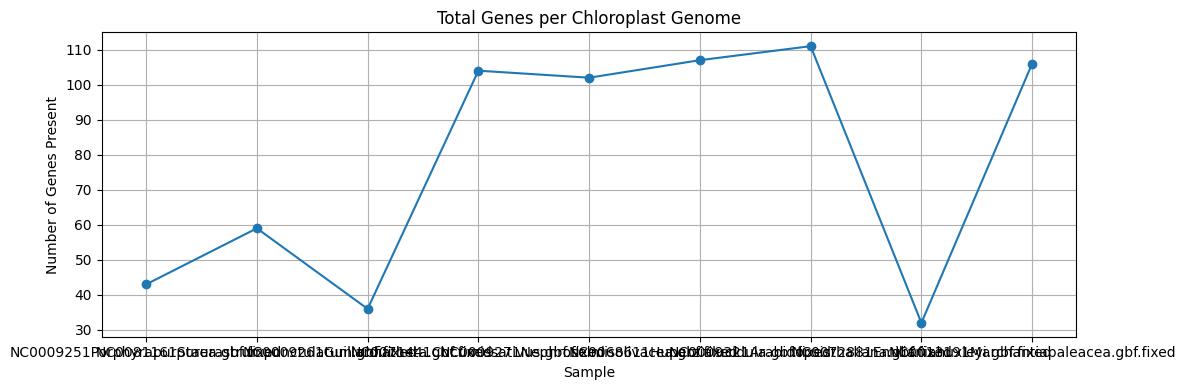

In [14]:
gene_counts = df_presence_absence.sum(axis=1)

# Plot
fig, ax = plt.subplots(figsize=(12, 4))
gene_counts.plot(kind="line", marker='o', ax=ax)

ax.set_xlabel("Sample")
ax.set_ylabel("Number of Genes Present")
ax.set_title("Total Genes per Chloroplast Genome")
ax.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def count_ambiguous_bases(seq_record):
    """
    Count ambiguous bases (N's) in a sequence record.
    
    Parameters:
        seq_record (SeqRecord): A Biopython SeqRecord object.
        
    Returns:
        int: Number of ambiguous bases in the sequence.
    """
    return seq_record.seq.count('N')

In [ ]:
# for each species, we need a decisionmaking criteria to determine which to keep. 
# remove the genomes not 50,000 < genome size < 300,000

# keep the species with the most genes

# look at the genome and keep the one with the fewest ambiguous bases (N's)

# how many conflicts remain?